In [45]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
# f2c202177ac5dab6e7811496a8b95b92efc42d2d
key = "f2c202177ac5dab6e7811496a8b95b92efc42d2d"

In [47]:
df = pd.read_csv('AAPL.csv')
df.shape


(1258, 15)

In [48]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [49]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [50]:
df1=df.reset_index()['close']

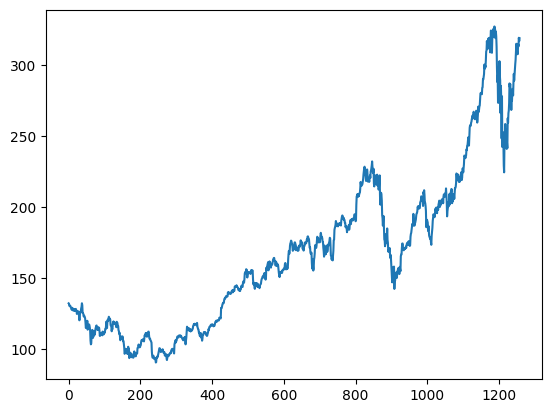

In [51]:
plt.plot(df1)

In [52]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [55]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [56]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [57]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [58]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\Alejandro\Documents\GitHub\ML-StockMarket\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0185 - val_loss: 0.0695
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 8.0839e-04 - val_loss: 0.0043
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 6.5490e-04 - val_loss: 0.0049
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 6.5264e-04 - val_loss: 0.0045
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 6.2601e-04 - val_loss: 0.0041
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 5.9728e-04 - val_loss: 0.0039
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 6.0144e-04 - val_loss: 0.0039
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 6.2070e-04 - val_loss: 0.0035
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 6.1338e-04 - val_loss: 0.0034
Epoch 12/100
12

In [62]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [63]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [64]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.71355531419155

In [65]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

239.79365910691078

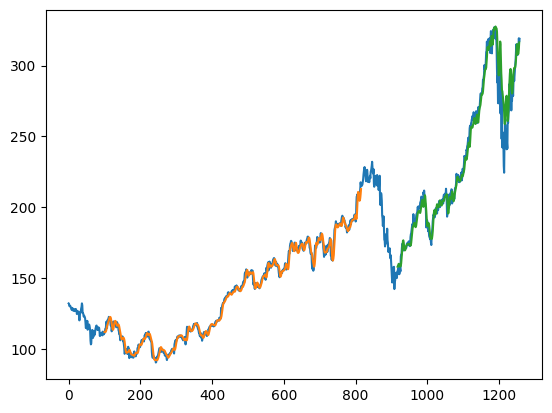

In [66]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

441

In [68]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [69]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [70]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [71]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.9734904]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [73]:
len(df1)

1258

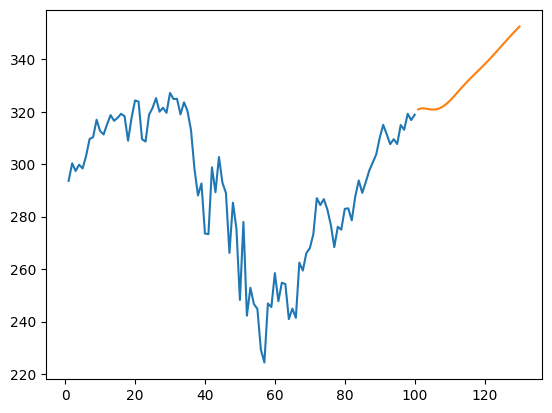

In [74]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

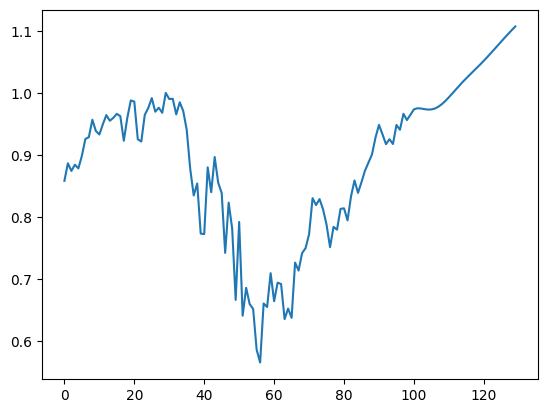

In [75]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1158:])

In [76]:
df3=scaler.inverse_transform(df3).tolist()

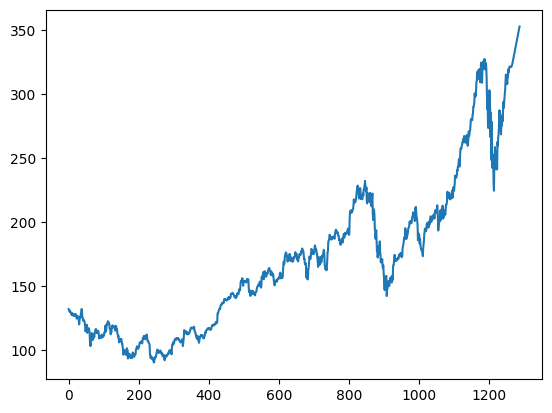

In [77]:
plt.plot(df3)

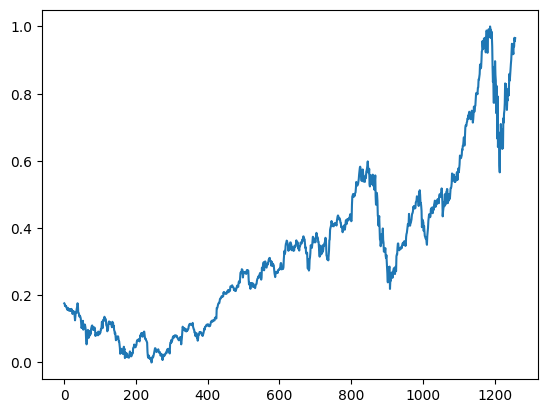

In [78]:
plt.plot(df1)

In [82]:
model.save('Model_Saved/LSTM_Model.h5')

In [85]:
import tensorflow as tf

# 1. Load your trained LSTM model
#    Assuming it's saved as a Keras H5 file
model = tf.keras.models.load_model('Model_Saved/LSTM_Model.h5')

# 2. Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) Apply optimizations for deployment (highly recommended for mobile)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# --- FIX FOR LSTM CONVERSION ERROR ---
# Enable Select TF Ops and disable experimental lowering of tensor list ops
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,   # Standard TFLite operations
    tf.lite.OpsSet.SELECT_TF_OPS     # Allows using some original TensorFlow operations
]
converter._experimental_lower_tensor_list_ops = False
# -----------------------------------

tflite_model = converter.convert()

# 3. Save the .tflite model to a file
with open('LSTM-S.tflite', 'wb') as f:
    f.write(tflite_model)

print("LSTM model successfully converted to 'your_lstm_model.tflite'")



INFO:tensorflow:Assets written to: C:\Users\ALEJAN~1\AppData\Local\Temp\tmpe0gao7ku\assets


INFO:tensorflow:Assets written to: C:\Users\ALEJAN~1\AppData\Local\Temp\tmpe0gao7ku\assets


Saved artifact at 'C:\Users\ALEJAN~1\AppData\Local\Temp\tmpe0gao7ku'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2638899853264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900619088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900617744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900618512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900617936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900617168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900617360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900614480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900616208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2638900615824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  263890